In [148]:
from HyperRD.Hrandom import *
from HyperRD.Halgorithm import *
from HyperRD.Hgraph import *
from HyperRD.Hdynamic import *
from HyperRD.Htranslate import *
import random
import numpy as np
import matplotlib.pyplot as plt

def compute_mutual_information(trajectory1, trajectory2, bins=10):
    # Compute histograms
    hist_1, _ = np.histogram(trajectory1, bins=bins, density=True)
    hist_2, _ = np.histogram(trajectory2, bins=bins, density=True)
    
    # Compute joint histogram
    joint_hist, _, _ = np.histogram2d(trajectory1, trajectory2, bins=bins, density=True)
    
    # Compute mutual information
    eps = np.finfo(float).eps
    mutual_info = np.sum(joint_hist * np.log2((joint_hist + eps) / (np.outer(hist_1, hist_2) + eps)))
    
    return mutual_info

# Parameters
num_vertices = 20
maximum_hyperedge_size = 3
infection_probability = 0.4
recovery_probability = 0.1
num_steps = 10

# Initialize hypergraph
vertices = range(num_vertices)
graph = simple_order(num_vertices, maximum_hyperedge_size, 0.02)

# Initialize states
states = ['S'] * num_vertices  # S: Susceptible, I: Infected, R: Recovered
initial_infected = random.sample(vertices, 1)
for i in initial_infected:
    states[i] = 'I'
    
# Lists to store the trajectory
susceptible_traj = [len([v for v in states if v == 'S'])]
infected_traj = [len([v for v in states if v == 'I'])]
recovered_traj = [len([v for v in states if v == 'R'])]

# Simulation function
def simulate_step():
    new_states = states.copy()
    for e in graph.edges:
        infected = [v for v in e if states[v] == 'I']
        if infected:
            for v in e:
                if states[v] == 'S' and random.random() < 1 - (1 - infection_probability)**len(infected):
                    new_states[v] = 'I'
                elif states[v] == 'I' and random.random() < recovery_probability:
                    new_states[v] = 'R'
    return new_states

# Run the simulation
for step in range(num_steps):
    states = simulate_step()
    susceptible_traj.append(len([v for v in states if v == 'S']))
    infected_traj.append(len([v for v in states if v == 'I']))
    recovered_traj.append(len([v for v in states if v == 'R']))

# # Visualize
# colors = ['blue' if state == 'S' else 'red' if state == 'I' else 'green' for state in states]
# graph_x = hyperrd_to_hypernetx(graph)
# hnx.drawing.draw(graph_x, 
#                  with_edge_labels = False, 
#                  layout_kwargs = {'seed': 39}, edges_kwargs={
#      'edgecolors': 'black'
#     },
#                  nodes_kwargs={
#      'facecolors': colors
#     })

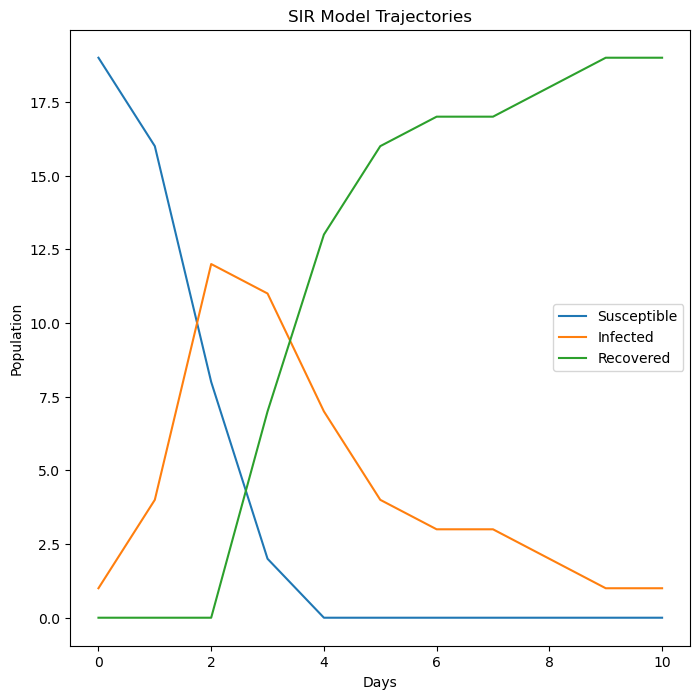

Mutual Information between Susceptible and Infected: 0.48530451730188723


In [149]:
# Plot the trajectories
plt.plot(susceptible_traj, label='Susceptible')
plt.plot(infected_traj, label='Infected')
plt.plot(recovered_traj, label='Recovered')
plt.title('SIR Model Trajectories')
plt.xlabel('Days')
plt.ylabel('Population')
plt.legend()
plt.show()

# Print the computed mutual information
mutual_info = compute_mutual_information(susceptible_traj, infected_traj)
print(f'Mutual Information between Susceptible and Infected: {mutual_info}')